# DDPM Schedule

In [1]:
import matplotlib.pyplot as plt
import torch

In [4]:
def ddpm_schedules(
    beta1: float, beta2: float, num_timesteps: int
) -> dict[str, torch.Tensor]:
    """
    Computes the DDPM schedules based on the provided betas and number of timesteps.

    This function computes a variety of terms used in a DDPM, based on a linear schedule of beta values
    from `beta1` to `beta2` over `num_timesteps + 1` intervals.

    Args:
        beta1: The starting value of the beta schedule.
        beta2: The ending value of the beta schedule.
        num_timesteps: The total number of timesteps in the diffusion process.

    Returns:
        A dictionary containing the computed terms, each as a tensor:
            - "alpha_t": The alpha schedule, complementary to the beta schedule.
            - "alphabar_t": The cumulative product of the alpha schedule.
            - "sqrtab": The square root of the cumulative product of the alpha schedule.
            - "sqrtmab": The square root of (1 - cumulative product of the alpha schedule).
    """
    # Ensure beta1 and beta2 are within the open interval (0, 1)
    assert beta1 < beta2 < 1.0, "beta1 and beta2 must be in (0, 1)"

    # Compute the beta schedule using linear interpolation between beta1 and beta2
    beta_t = torch.linspace(beta1, beta2, num_timesteps)
    sqrt_beta_t = torch.sqrt(beta_t)
    alpha_t = 1 - beta_t

    log_alpha_t = torch.log(alpha_t)
    alphabar_t = torch.cumsum(log_alpha_t, dim=0).exp()

    sqrtab = torch.sqrt(alphabar_t)
    sqrtmab = torch.sqrt(1 - alphabar_t)
    mab_over_sqrtmab_inv = (1 - alpha_t) / sqrtmab

    # Pack the computed terms into a dictionary and return it
    return {
        "beta_t": beta_t,
        "sqrt_beta_t": sqrt_beta_t,
        "alpha_t": alpha_t,
        "alphabar_t": alphabar_t,
        "sqrtab": sqrtab,
        "sqrtmab": sqrtmab,
        "mab_over_sqrtmab": mab_over_sqrtmab_inv,
    }

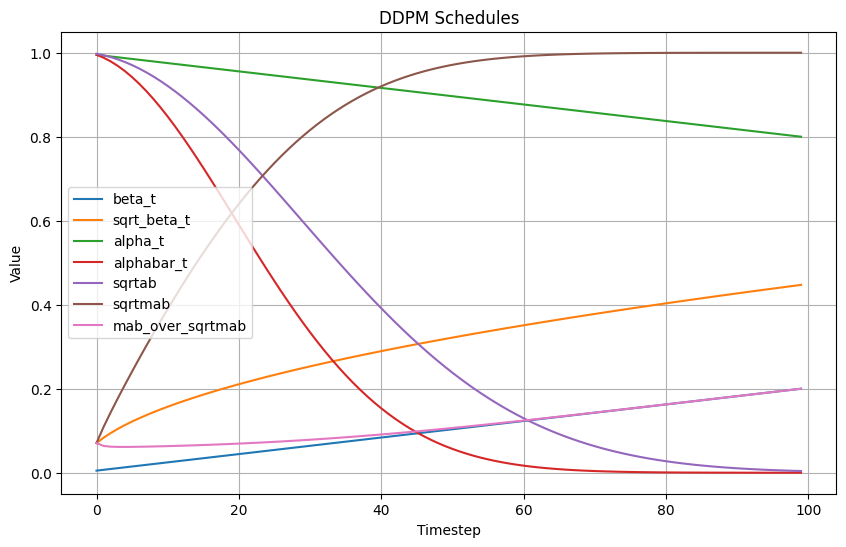

In [5]:
def plot_ddpm_schedules(beta1: float, beta2: float, num_timesteps: int) -> None:
    schedules = ddpm_schedules(beta1, beta2, num_timesteps)

    plt.figure(figsize=(10, 6))

    for key, schedule in schedules.items():
        plt.plot(schedule, label=key)

    plt.xlabel("Timestep")
    plt.ylabel("Value")
    plt.legend()
    plt.title("DDPM Schedules")
    plt.grid(True)
    plt.show()


plot_ddpm_schedules(0.005, 0.2, 100)